(100, 256)


/var/folders/b8/gmwfy7_j39n1yx71kb8wfxf1d1yljv/T/ipykernel_5462/2244705618.py:43: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


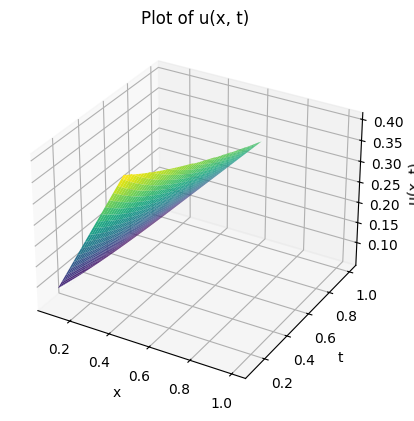

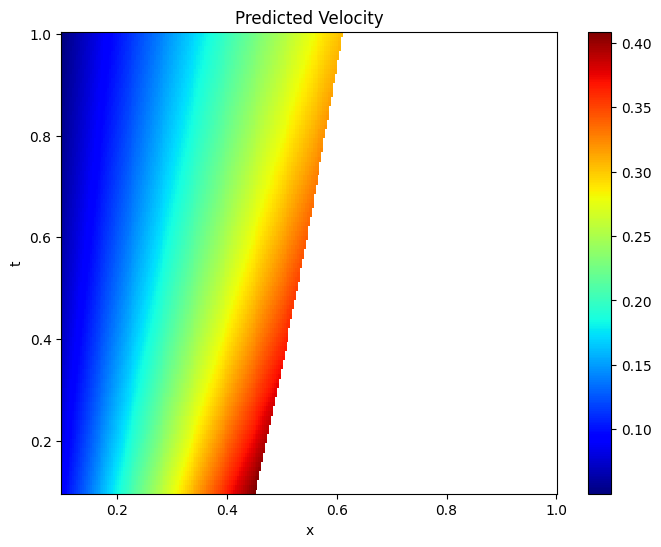

In [20]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function u(x, t)
def u(x, t):
    # re = 600
    # nu = 1.0 / re
    nu = 0.0005226988
    re = 1.0 / nu
    t0 = tf.exp(1.0 / (8.0 * nu))
    re = 1.0 / nu
    exp_term = tf.exp(re * x**2 / (4 * t + 4))
    return x / (t + 1) / (1 + tf.sqrt((t + 1) / t0) * exp_term)

# Define the range of x and t values
x_values = np.linspace(0.1, 1.0, 256)
t_values = np.linspace(0.1, 1.0, 100)
X, T = np.meshgrid(x_values, t_values)

# Define the viscosity nu and calculate u values
# nu = 0.01  # You can set your desired value for nu
X = tf.constant(X, dtype=tf.float32)
T = tf.constant(T, dtype=tf.float32)
U = u(X, T)
print(U.shape)
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, T, U, cmap='viridis')

# Set labels and title
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u(x, t)')
plt.title('Plot of u(x, t)')

plt.figure(figsize=(8, 6))
plt.pcolor(X, T, U, cmap='jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Predicted Velocity')
plt.show()

plt.show()
